# Analysis and Benchmark

> This notebook contains all of the results of scDenorm's analysis

In [51]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x2b200decd210>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from scipy.sparse import diags
from scipy.io import mmwrite
from tqdm import tqdm
from pathlib import Path
from typing import Union, Optional
import pickle
import seaborn as sns

In [2]:
from scDenorm.denorm import *

## 10 testing dataset with count matrix

In [172]:
h5_benchmark=['/home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad',
 '/home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad',
 '/home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad',
 '/home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad']

In [173]:
for i in h5_benchmark:
    tmp=sc.read(i)
    print(tmp.shape,i)

(123294, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad
(9192, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad
(29375, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad
(11020, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


(7232, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad
(98660, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad
(13214, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad
(2751, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


(15390, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad
(16271, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


# Figure 1

### restore errors

In [26]:
ress={}
for i in h5_benchmark:
    ad=sc.read(i)
    ad=ad[0:min(ad.shape[0],1000),:]
    ad.layers['count']=ad.X.copy()
    sc.pp.normalize_total(ad, target_sum=1e4)
    sc.pp.log1p(ad)
    new_ad=scdenorm(ad)
    res=new_ad.X.data-new_ad.layers['count'].data
    ress[i.split('/')[-3]]=res
    print(abs(res).sum(),ad.shape,i)

100%|██████████| 1000/1000 [00:00<00:00, 2763.60it/s]


0.09852815 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2923.69it/s]


0.25611508 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2867.55it/s]


1.1155263 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|██████████| 1000/1000 [00:00<00:00, 2946.26it/s]


0.11780703 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2883.91it/s]


0.4915353 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2723.79it/s]


0.5573318 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3084.23it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


0.0368073 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3105.67it/s]


0.248968 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3064.30it/s]


0.092314124 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2469.34it/s]


1.3098155 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


In [95]:
with open('data/restore_errors.pickle', 'wb') as handle:
    pickle.dump(ress, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('data/restore_errors.pickle', 'rb') as handle:
    ress = pickle.load(handle)

In [197]:
ress

{'human_mouse_brain_Welch_2019_10x': array([4.7683716e-07, 0.0000000e+00, 0.0000000e+00, ..., 2.3841858e-07,
        2.3841858e-07, 0.0000000e+00], dtype=float32),
 'mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium': array([ 0.0000000e+00, -1.1444092e-05, -7.6293945e-06, ...,
         2.3841858e-07,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 'human_brain_organoids_Fiorenzano_2021_10x': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -7.6293945e-06,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 'mouse_brain_OB_Mizrak_2020_SCOPE-seq': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.8146973e-06,  0.0000000e+00], dtype=float32),
 'mouse_brain_choroid_plexus_Dani_2021_10x': array([0.0000000e+00, 1.9073486e-06, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 'human_

### Performance

#### running time linearly increase by cell
20000genes X n cells

In [60]:
tmp=sc.read('/home/huang_ziliang/project/brain/data/public/human_brain_CNS_Marsh_2022_10x/h5/human_brain_CNS_Marsh_2022_10x.h5ad')

In [61]:
tmp

AnnData object with n_obs × n_vars = 139661 × 68308
    obs: 'sample', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'feature_types-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'feature_types-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-21', 'feature_types-21', 'gene_ids-22', 'feature_types-22', 'gene_ids-23', 'feature_types-23', 'gene_ids-24', 'feature_types-24', 'gene_ids-25', 'feature_types-25', 'gene_ids-26', 'feature_types-26', 'gene_ids-27', 'feature_types-27', 'gene_ids-28', 'gene_ids-29', 'gene_ids-3', 'feature_types-3', 'gene_ids-30', 'gene_ids-31', 'gene_ids-4', 'feature_types-4', 'gene_ids-5', 'feature_types-5', 'gene_ids-6', 'feature_t

In [79]:
numpy.random.seed(0)
r_idx=[]
for i in range(100):
    r_idx.append([numpy.random.choice(np.arange(tmp.shape[1]),n,replace=False) for n in [10000,15000,20000,25000,30000,35000]])

In [175]:
r_idx[0]

[array([35347, 56556, 58377, ..., 26609, 34536, 15664]),
 array([49612,  5061, 56380, ..., 55725, 32868, 39613]),
 array([53448,  4067, 15778, ..., 32270, 41636, 60688]),
 array([27928, 54571,  9606, ..., 48172, 36031, 53703]),
 array([46590, 56848,  8378, ..., 32744,   220, 37649]),
 array([10544, 29848, 41193, ..., 51200, 30760, 53895])]

In [128]:
cn=[1000,5000,10000,15000,20000,25000,30000]

In [ ]:
import time
gene20000=[]
for i,idx in enumerate(r_idx):
    print(i)
    for cells in cn:
        ad=tmp[:cells,idx[2]].copy()
        ad.layers['count']=ad.X.copy()
        sc.pp.normalize_total(ad, target_sum=1e4)
        sc.pp.log1p(ad)
        start = time.time()
        new_ad=scdenorm(ad)
        end = time.time()
        res=new_ad.X.data-new_ad.layers['count'].data
        gene20000.append([end - start,abs(res).sum(),ad.shape[0],ad.shape[1]])

In [176]:
df=pd.DataFrame(gene20000,columns=['time','sar','cells','genes'])

In [182]:
with open('data/times-gene20000.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [183]:
df

,time,sar,cells,genes
0,190.354524,2.905966,25000,20000
1,211.746687,3.161369,30000,20000
2,184.370135,2.154961,25000,20000
3,201.325987,2.329163,30000,20000
4,180.542773,3.135068,25000,20000
...,...,...,...,...
695,208.088639,2.483778,30000,20000
696,184.355699,2.486861,25000,20000
697,206.096520,2.756315,30000,20000
698,183.401396,2.334402,25000,20000


<AxesSubplot:xlabel='cells', ylabel='time'>

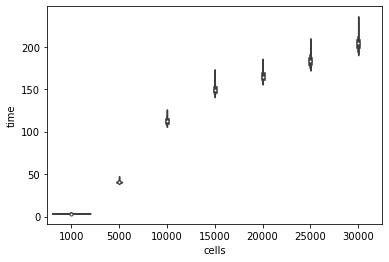

In [179]:
figsize(6,4)
sns.violinplot(y="time", x="cells",data=df)

In [137]:
def plot_mv(cmean,cvar,ax):
    ax.loglog()
    ax.scatter(cmean, cvar)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

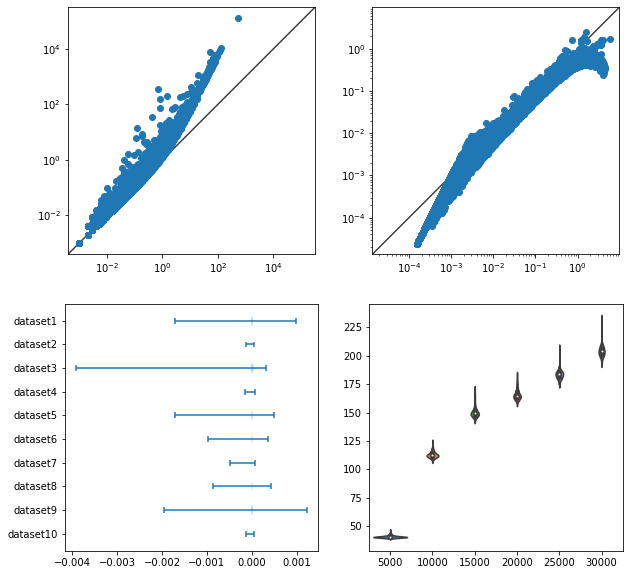

In [159]:
figsize(10,10)
fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2,2)

ad=sc.read(h5_benchmark[2])
ad=ad[0:min(ad.shape[0],1000),:]
smtx=ad.X
cmean = np.array(smtx.mean(0))
cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
#A
plot_mv(cmean,cvar,ax1)
#B
ad.layers['count']=ad.X.copy()
sc.pp.normalize_total(ad, target_sum=1e4)
sc.pp.log1p(ad)
smtx=ad.X
cmean = np.array(smtx.mean(0))
cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
plot_mv(cmean,cvar,ax2)
#C
ax3.violinplot(ress.values(),vert=False)
ax3.set_yticks([i+1 for i in range(10)])
ax3.set_yticklabels(['dataset'+str(10-i) for i in range(10)])
#D
#ax4=sns.violinplot(ax=ax4,y="time", x="cells",data=pd.DataFrame(gene20000,columns=['time','sar','cells','genes']))
ax4=sns.violinplot(ax=ax4,y="time", x="cells",data=df[df.cells!=1000])
ax4.set(xlabel=None)
ax4.set(ylabel=None)
plt.savefig('figures/Figure1.pdf',dpi=600,format='pdf', transparent=True)
plt.show()

## Sup Figure 1 - the relationship between the mean and variance of genes before normalization

### before normlization

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


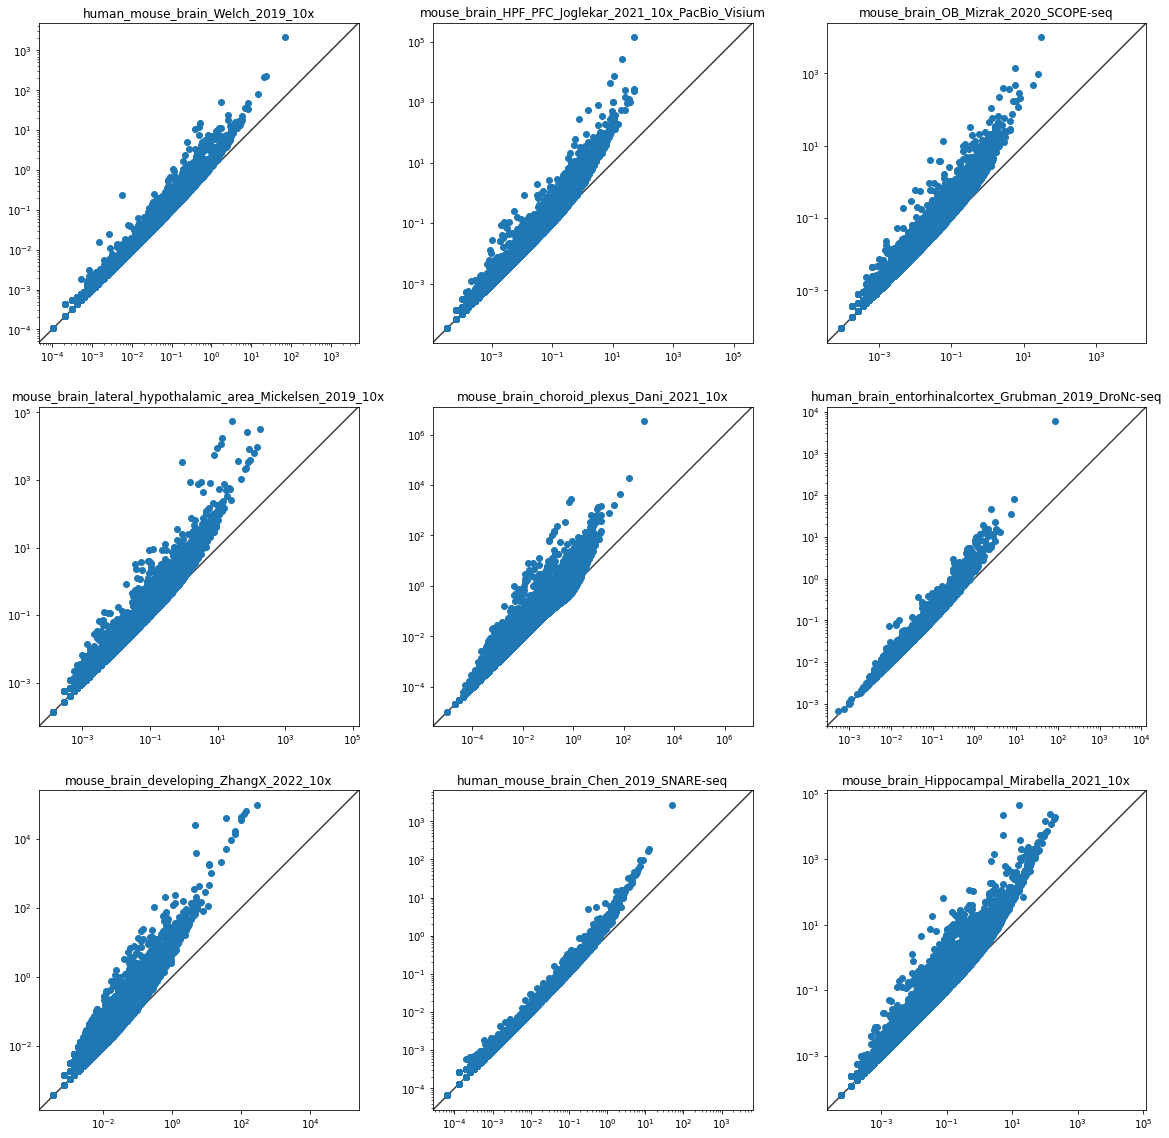

In [170]:
fig, axs = plt.subplots(3,3,figsize=(20,20))
axs = axs.ravel()
for i,h5 in enumerate(h5_benchmark[1:]):
    ad=sc.read(h5)
    smtx=ad.X
    cmean = np.array(smtx.mean(0))
    cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)

    ax=axs[i]
    ax.loglog()
    ax.scatter(cmean, cvar)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.title.set_text(h5.split('/')[-3])
plt.savefig('figures/Sup_figure_1.pdf',dpi=600,format='pdf', transparent=True)
plt.show()

## Sup Figure 2 - the relationship between the mean and variance of genes after normalization

### after normlization

/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


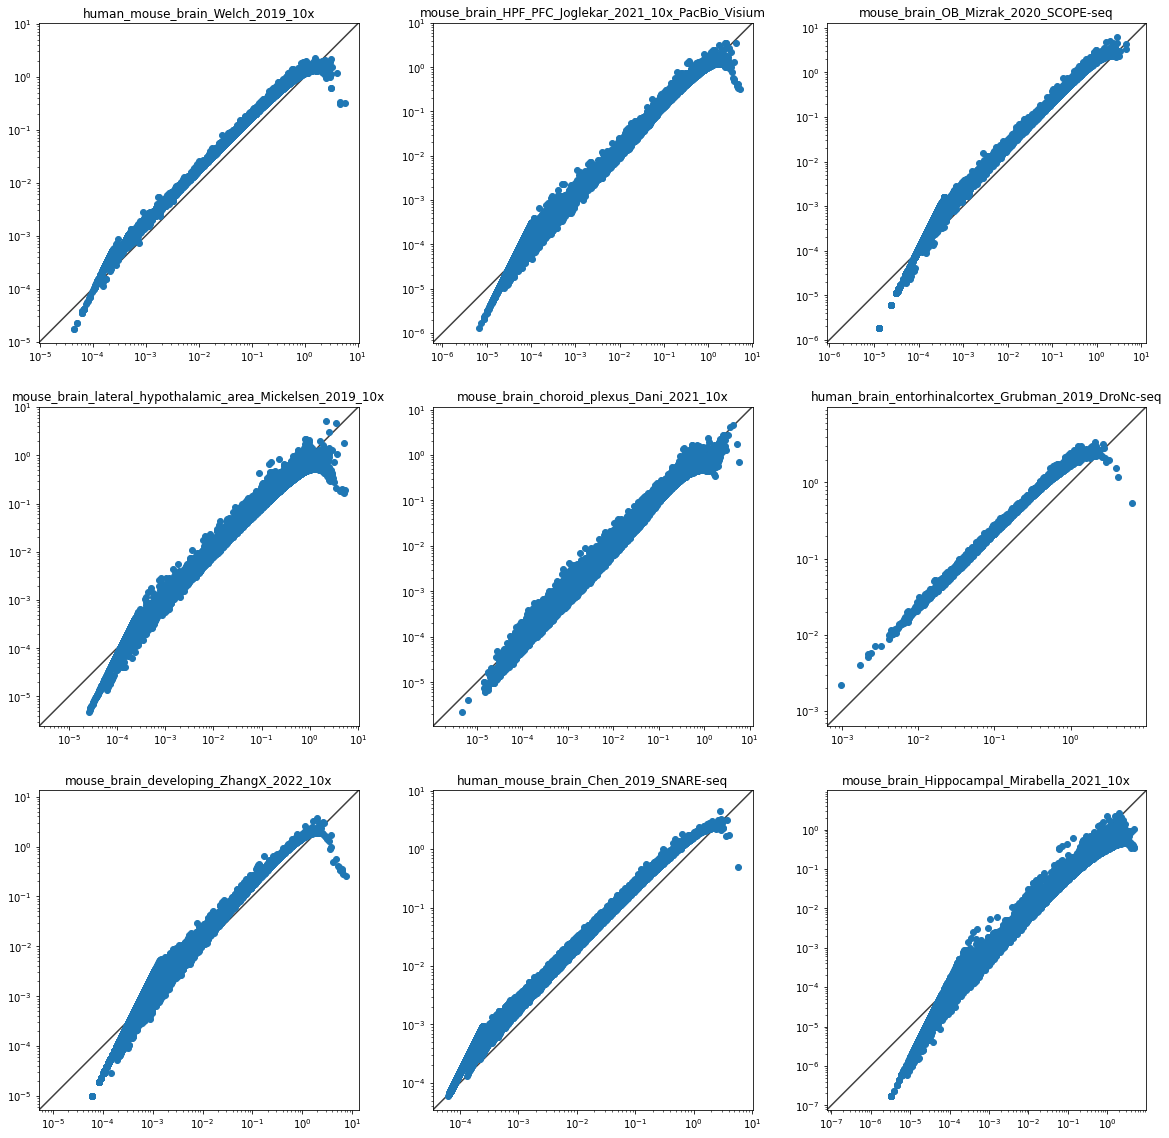

In [171]:
fig, axs = plt.subplots(3,3,figsize=(20,20))
axs = axs.ravel()
for i,h5 in enumerate(h5_benchmark[1:]):
    ad=sc.read(h5)
    ad.layers['count']=ad.X.copy()
    sc.pp.normalize_total(ad, target_sum=1e4)
    sc.pp.log1p(ad)
    smtx=ad.X
    cmean = np.array(smtx.mean(0))
    cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)

    ax=axs[i]
    ax.loglog()
    ax.scatter(cmean, cvar)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.title.set_text(h5.split('/')[-3])
plt.savefig('figures/Sup_figure_2.pdf',dpi=600,format='pdf', transparent=True)
plt.show()

##  Sup Figure 3 - the residual distribution of data restoration

### restore errors with total count 1e4, 1e5, 1e6 and log transformation with base e, 2, 10

In [29]:
rs=[]
for ts in [1e4,1e5,1e6]:
    for b in [np.e,2,10]:
        ress={}
        for i in h5_benchmark:
            ad=sc.read(i)
            ad=ad[0:min(ad.shape[0],1000),:]
            ad.layers['count']=ad.X.copy()
            sc.pp.normalize_total(ad, target_sum=ts)
            sc.pp.log1p(ad,base=b)
            new_ad=scdenorm(ad)
            res=new_ad.X.data-new_ad.layers['count'].data
            ress[i.split('/')[-3]]=res
            print(abs(res).sum(),ad.shape,i)
        rs.append(ress)

100%|██████████| 1000/1000 [00:00<00:00, 2828.85it/s]


1.1155263 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2880.37it/s]


0.09852815 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2870.19it/s]


0.25611508 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|██████████| 1000/1000 [00:00<00:00, 2925.16it/s]


0.11780703 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2645.70it/s]


0.4915353 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2827.43it/s]


0.5573318 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2652.13it/s]


0.0368073 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|██████████| 1000/1000 [00:00<00:00, 3049.77it/s]


0.248968 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2778.08it/s]


0.092314124 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2639.10it/s]


1.3098155 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2828.44it/s]


1.2534279 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2825.41it/s]


0.12379563 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2819.51it/s]


0.2889731 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3085.84it/s]


0.15083778 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2727.16it/s]


0.5720973 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2631.88it/s]
ERROR:root:The base 2.718281828459045 is not match with the data.


0.6559125 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3063.27it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.


0.050880313 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3171.10it/s]


0.29993808 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3068.74it/s]


0.11629987 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2472.22it/s]


1.4461886 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2880.11it/s]


1.2432445 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2900.13it/s]


0.12818134 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2231.17it/s]


0.3009503 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3018.18it/s]


0.15135574 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2874.49it/s]


0.5852072 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2656.99it/s]


0.6666825 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 1489.78it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.


27923.477 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3123.01it/s]


0.29119813 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2949.62it/s]


0.1195122 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2814.29it/s]


1.4933422 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2755.19it/s]


1.1155263 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2958.12it/s]


0.09852815 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2902.64it/s]


0.25611508 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|██████████| 1000/1000 [00:00<00:00, 3084.81it/s]


0.11780703 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2706.99it/s]


0.4915353 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2363.77it/s]


0.5573318 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2976.43it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


0.0368073 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2754.64it/s]


0.248968 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2769.74it/s]


0.092314124 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2797.06it/s]


1.3098155 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2808.44it/s]


1.2534279 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2993.07it/s]


0.12379563 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2898.33it/s]


0.2889731 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2585.17it/s]


0.15083778 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2099.84it/s]


0.5720973 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2815.66it/s]


0.6559125 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3144.90it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.


0.050880313 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3129.21it/s]


0.29993808 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3053.43it/s]


0.11629987 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2649.37it/s]


1.4461886 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2698.00it/s]


1.2432445 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2747.77it/s]


0.12818134 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3040.63it/s]


0.3009503 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3102.86it/s]


0.15135574 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2891.87it/s]


0.5852072 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 1328.66it/s]
ERROR:root:The base 2.718281828459045 is not match with the data.


0.6666825 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 1402.13it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.


27923.477 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2771.77it/s]


0.29119813 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2439.25it/s]


0.1195122 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2801.10it/s]


1.4933422 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2882.55it/s]


1.1155263 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3051.14it/s]


0.09852815 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3002.55it/s]


0.25611508 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|██████████| 1000/1000 [00:00<00:00, 3052.57it/s]


0.11780703 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2873.80it/s]


0.4915353 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2621.60it/s]


0.5573318 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3094.39it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


0.0368073 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3075.26it/s]


0.248968 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3077.08it/s]


0.092314124 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 2809.82it/s]


1.3098155 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2849.80it/s]


1.2534279 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2819.20it/s]


0.12379563 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3020.94it/s]


0.2889731 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3064.65it/s]


0.15083778 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2887.36it/s]


0.5720973 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2685.40it/s]
ERROR:root:The base 2.718281828459045 is not match with the data.


0.6559125 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3109.65it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.


0.050880313 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3065.15it/s]


0.29993808 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2940.66it/s]


0.11629987 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2389.58it/s]


1.4461886 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2867.31it/s]


1.2432445 (1000, 28788) /home/huang_ziliang/project/brain/data/public/human_brain_organoids_Fiorenzano_2021_10x/h5/human_brain_organoids_Fiorenzano_2021_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3058.29it/s]


0.12818134 (1000, 29445) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Welch_2019_10x/h5/GSE126836_SN_MD5534.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2483.63it/s]


0.3009503 (1000, 32452) /home/huang_ziliang/project/brain/data/public/mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium/h5/mouse_brain_HPF_PFC_Joglekar_2021_10x.h5ad


/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3056.25it/s]


0.15135574 (1000, 48528) /home/huang_ziliang/project/brain/data/public/mouse_brain_OB_Mizrak_2020_SCOPE-seq/h5/mouse_brain_OB_Mizrak_2020_SCOPE-seq.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2872.62it/s]


0.5852072 (1000, 28692) /home/huang_ziliang/project/brain/data/public/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x/h5/mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2862.84it/s]
ERROR:root:The base 2.718281828459045 is not match with the data.


0.6666825 (1000, 23890) /home/huang_ziliang/project/brain/data/public/mouse_brain_choroid_plexus_Dani_2021_10x/h5/mouse_brain_choroid_plexus_Dani_2021_10x.h5ad


100%|██████████| 1000/1000 [00:02<00:00, 440.36it/s]
/home/huang_yin/anaconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.


27923.477 (1000, 10850) /home/huang_ziliang/project/brain/data/public/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq/h5/human_brain_entorhinalcortex_Grubman_2019_DroNc-seq.h5ad


100%|██████████| 1000/1000 [00:00<00:00, 3042.09it/s]


0.29119813 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_developing_ZhangX_2022_10x/h5/Brain-Young-scRNAseq-rep1.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 3081.58it/s]


0.1195122 (1000, 33289) /home/huang_ziliang/project/brain/data/public/human_mouse_brain_Chen_2019_SNARE-seq/h5/RNA.h5ad


ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 2 is not match with the data.
100%|██████████| 1000/1000 [00:00<00:00, 2086.79it/s]


1.4933422 (1000, 31053) /home/huang_ziliang/project/brain/data/public/mouse_brain_Hippocampal_Mirabella_2021_10x/h5/mouse_brain_Hippocampal_Mirabella_2021_10x_in_vivo.h5ad


In [18]:
import pickle
with open('data/restore_errors_all.pickle', 'wb') as handle:
    pickle.dump(rs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
with open('data/restore_errors_all.pickle', 'rb') as handle:
    rs = pickle.load(handle)

In [20]:
titles=[]
for ts in ['1e4','1e5','1e6']:
    for b in ['e','2','10']:
        titles.append(f'{ts} and {b}')

In [21]:
titles

['1e4 and e',
 '1e4 and 2',
 '1e4 and 10',
 '1e5 and e',
 '1e5 and 2',
 '1e5 and 10',
 '1e6 and e',
 '1e6 and 2',
 '1e6 and 10']

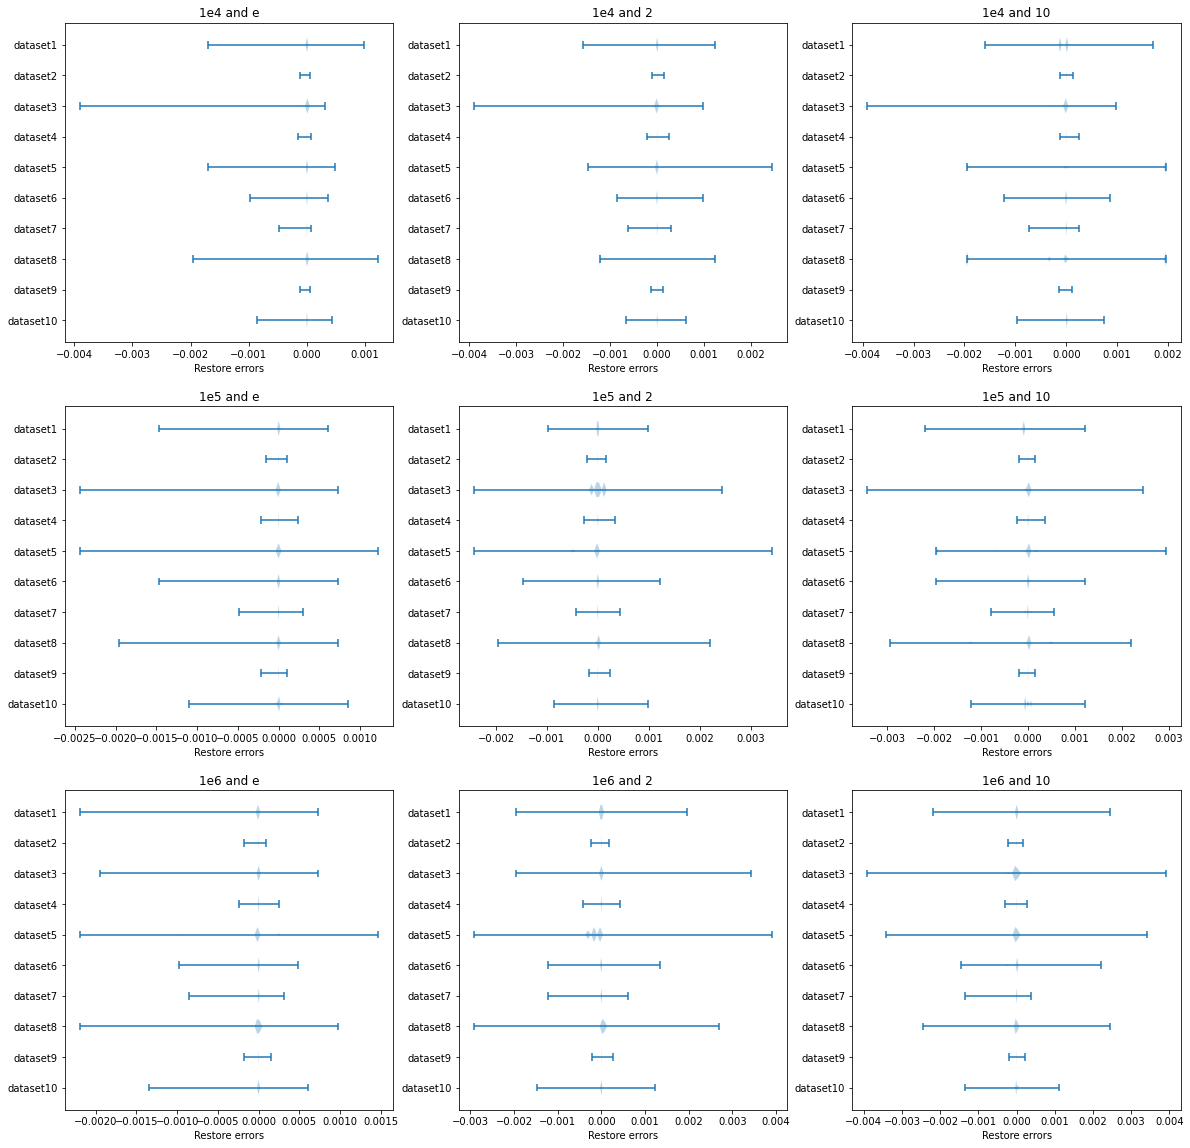

In [22]:
fig, axs = plt.subplots(3,3,figsize=(20,20))
axs = axs.ravel()
for i,ress in enumerate(rs):
    ax=axs[i]
    ax.violinplot(ress.values(),vert=False)
    ax.set_yticks([i+1 for i in range(10)])
    ax.set_yticklabels(['dataset'+str(10-i) for i in range(10)])
    ax.set_xlabel("Restore errors")
    ax.title.set_text(titles[i])
plt.savefig('figures/Sup_figure_4.pdf',dpi=600,format='pdf', transparent=True)
plt.show()

##  Sup Figure 4 - the performance benchmark

### Performance

#### running time linearly increase by genes

1000 cells X genes

In [60]:
tmp=sc.read('/home/huang_ziliang/project/brain/data/public/human_brain_CNS_Marsh_2022_10x/h5/human_brain_CNS_Marsh_2022_10x.h5ad')

In [61]:
tmp

AnnData object with n_obs × n_vars = 139661 × 68308
    obs: 'sample', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'feature_types-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'feature_types-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-21', 'feature_types-21', 'gene_ids-22', 'feature_types-22', 'gene_ids-23', 'feature_types-23', 'gene_ids-24', 'feature_types-24', 'gene_ids-25', 'feature_types-25', 'gene_ids-26', 'feature_types-26', 'gene_ids-27', 'feature_types-27', 'gene_ids-28', 'gene_ids-29', 'gene_ids-3', 'feature_types-3', 'gene_ids-30', 'gene_ids-31', 'gene_ids-4', 'feature_types-4', 'gene_ids-5', 'feature_types-5', 'gene_ids-6', 'feature_t

In [79]:
numpy.random.seed(0)
r_idx=[]
for i in range(100):
    r_idx.append([numpy.random.choice(np.arange(tmp.shape[1]),n,replace=False) for n in [10000,15000,20000,25000,30000,35000]])

In [78]:
r_idx[0]

[array([35347, 56556, 58377, ..., 26609, 34536, 15664]),
 array([49612,  5061, 56380, ..., 55725, 32868, 39613]),
 array([53448,  4067, 15778, ..., 32270, 41636, 60688]),
 array([27928, 54571,  9606, ..., 48172, 36031, 53703]),
 array([46590, 56848,  8378, ..., 32744,   220, 37649]),
 array([10544, 29848, 41193, ..., 51200, 30760, 53895])]

In [84]:
import time
cell1000=[]
for i,idx in enumerate(r_idx):
    for genes in idx:
        ad=tmp[:1000,genes].copy()
        ad.layers['count']=ad.X.copy()
        sc.pp.normalize_total(ad, target_sum=1e4)
        sc.pp.log1p(ad)
        start = time.time()
        new_ad=scdenorm(ad)
        end = time.time()
        res=new_ad.X.data-new_ad.layers['count'].data
        cell1000.append([end - start,abs(res).sum(),ad.shape[0],ad.shape[1]])

100%|██████████| 1000/1000 [00:00<00:00, 3009.32it/s]


In [88]:
df1000=pd.DataFrame(cell1000)

In [90]:
df1000.columns=['time','sar','cells','genes']

In [119]:
df1000

,time,sar,cells,genes
0,1.262643,0.010460,1000,10000
1,2.226568,0.024844,1000,15000
2,3.635163,0.021536,1000,20000
3,5.206052,0.022915,1000,25000
4,7.207669,0.023130,1000,30000
...,...,...,...,...
595,2.391077,0.025924,1000,15000
596,3.469960,0.014862,1000,20000
597,5.460088,0.020331,1000,25000
598,7.236061,0.036820,1000,30000


In [122]:
with open('data/times-cell1000.pickle', 'wb') as handle:
    pickle.dump(df1000, handle, protocol=pickle.HIGHEST_PROTOCOL)

<AxesSubplot:xlabel='genes', ylabel='time'>

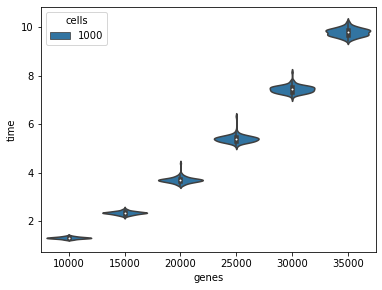

In [120]:
sns.violinplot(y="time", x="genes", hue="cells",data=df1000)

### plot

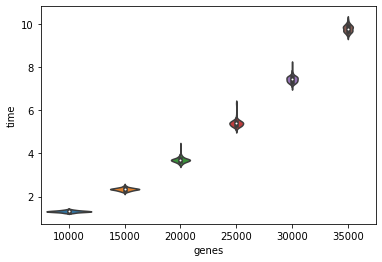

In [188]:
figsize(6,4)
sns.violinplot(y="time", x="genes",data=df1000)
plt.savefig('figures/Sup_figure_4.pdf',dpi=600,format='pdf', transparent=True)
plt.show()

In [115]:
import time
cell5000=[]
for i,idx in enumerate(r_idx):
    for genes in idx:
        ad=tmp[:5000,genes].copy()
        ad.layers['count']=ad.X.copy()
        sc.pp.normalize_total(ad, target_sum=1e4)
        sc.pp.log1p(ad)
        start = time.time()
        new_ad=scdenorm(ad)
        end = time.time()
        res=new_ad.X.data-new_ad.layers['count'].data
        cell1000.append([end - start,abs(res).sum(),ad.shape[0],ad.shape[1]])

100%|██████████| 5000/5000 [00:01<00:00, 3011.33it/s]


In [116]:
cell5000=cell1000

In [123]:
df5000=pd.DataFrame(cell5000)

In [124]:
df5000.columns=['time','sar','cells','genes']

In [125]:
df5000

,time,sar,cells,genes
0,1.262643,0.010460,1000,10000
1,2.226568,0.024844,1000,15000
2,3.635163,0.021536,1000,20000
3,5.206052,0.022915,1000,25000
4,7.207669,0.023130,1000,30000
...,...,...,...,...
1195,25.136389,0.466444,5000,15000
1196,40.897507,0.549642,5000,20000
1197,63.603122,0.805889,5000,25000
1198,86.987759,0.860874,5000,30000


In [126]:
with open('data/times-cell5000.pickle', 'wb') as handle:
    pickle.dump(df5000, handle, protocol=pickle.HIGHEST_PROTOCOL)

<AxesSubplot:xlabel='genes', ylabel='time'>

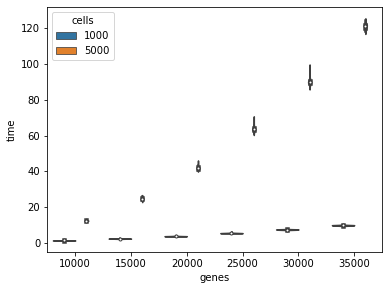

In [127]:
sns.violinplot(y="time", x="genes", hue="cells",data=df5000)

##  Sup Figure 5 - denormalizing a normalized expression on three published datasets

In [198]:
h5_paths_norm=['/home/huang_ziliang/project/brain/data/public/human_mouse_brain_source_Gaublomme_2019/h5/experiment1_all_lowremove.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_source_Habib_2017/h5/mouse.h5ad',
 '/home/huang_ziliang/project/brain/data/public/mouse_brain_BasalGanglia_Wallace_2017_Drop-seq/h5/mouse_brain_BasalGanglia_Wallace_2017_Drop-seq.h5ad']

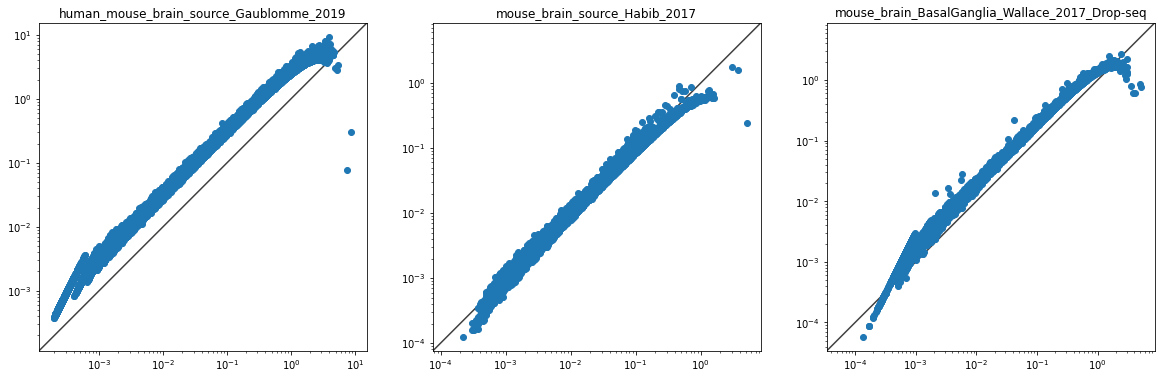

In [71]:
fig, axs = plt.subplots(1,3,figsize=(20,7))
axs = axs.ravel()
for i,h5 in enumerate(h5_paths_norm):
    ad=sc.read(h5)
    smtx=ad.X
    cmean = np.array(smtx.mean(0))
    cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)

    ax=axs[i]
    ax.loglog()
    ax.scatter(cmean, cvar)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.title.set_text(h5.split('/')[-3])
plt.savefig('figures/Sup_figure_5.pdf',dpi=600,format='pdf', transparent=True)
plt.show()

INFO:root:The dimensions of this data are (9923, 28363).
INFO:root:select base
INFO:root:denormlizing ...
100%|██████████| 9923/9923 [00:03<00:00, 2993.17it/s]
INFO:root:The dimensions of this data are (13313, 17308).
INFO:root:select base
INFO:root:denormlizing ...
100%|██████████| 13313/13313 [00:04<00:00, 3077.21it/s]
INFO:root:The dimensions of this data are (3101, 16484).
INFO:root:select base
INFO:root:denormlizing ...
100%|██████████| 3101/3101 [00:01<00:00, 3019.18it/s]


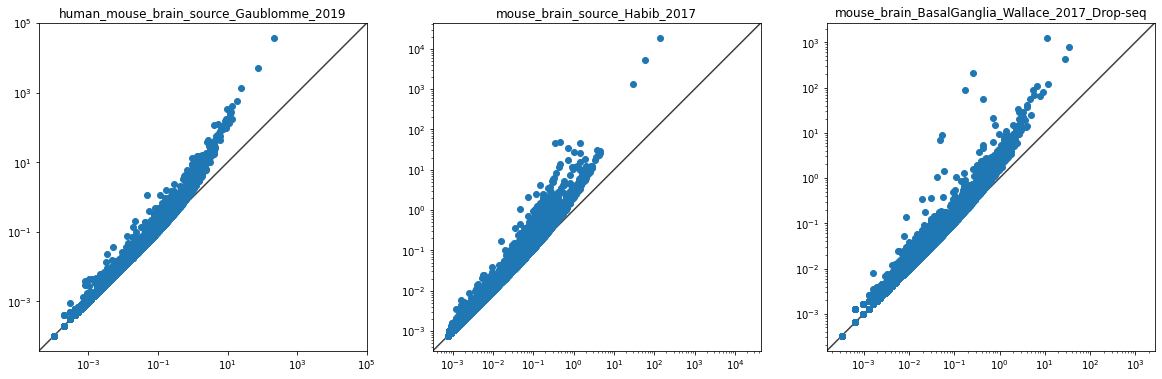

In [74]:
fig, axs = plt.subplots(1,3,figsize=(20,7))
axs = axs.ravel()
for i,h5 in enumerate(h5_paths_norm):
    ad=sc.read(h5)
    ad=scdenorm(ad,verbose=1)
    smtx=ad.X
    cmean = np.array(smtx.mean(0))
    cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)

    ax=axs[i]
    ax.loglog()
    ax.scatter(cmean, cvar)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.title.set_text(h5.split('/')[-3])
plt.savefig('figures/Sup_figure_6.pdf',dpi=600,format='pdf', transparent=True)
plt.show()

## Sup Table 1 - testing datasets 

In [202]:
all_datasets=h5_benchmark+h5_paths_norm

In [204]:
name=[h5.split('/')[-3] for h5 in all_datasets]

In [205]:
name

['human_brain_organoids_Fiorenzano_2021_10x',
 'human_mouse_brain_Welch_2019_10x',
 'mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_Visium',
 'mouse_brain_OB_Mizrak_2020_SCOPE-seq',
 'mouse_brain_lateral_hypothalamic_area_Mickelsen_2019_10x',
 'mouse_brain_choroid_plexus_Dani_2021_10x',
 'human_brain_entorhinalcortex_Grubman_2019_DroNc-seq',
 'mouse_brain_developing_ZhangX_2022_10x',
 'human_mouse_brain_Chen_2019_SNARE-seq',
 'mouse_brain_Hippocampal_Mirabella_2021_10x',
 'human_mouse_brain_source_Gaublomme_2019',
 'mouse_brain_source_Habib_2017',
 'mouse_brain_BasalGanglia_Wallace_2017_Drop-seq']

In [206]:
normalized=[True]*10+[False]*3

In [217]:
data=['GSE168323',
     'GSE126836',
     'GSE158450',
     'GSE134918',
     'GSE125065',
     'GSE168704',
     'GSE138852',
     'GSE178957',
     'GSE126074',
     'GSE180345',
     'https://portals.broadinstitute.org/single_cell/study/SCP375/experiment-1-stonly',
     'GSE71585',
     'GSE95133']

In [218]:
paper=["Single-cell transcriptomics captures features of human midbrain development and dopamine neuron diversity in brain organoids",
"Single-Cell Multi-omic Integration Compares and Contrasts Features of Brain Cell Identity",
"A spatially resolved brain region- and cell type-specific isoform atlas of the postnatal mouse brain",
"Single-Cell Profiling and SCOPE-Seq Reveal Lineage Dynamics of Adult Ventricular-Subventricular Zone Neurogenesis and NOTUM as a Key Regulator",
"Single-cell transcriptomic analysis of the lateral hypothalamic area reveals molecularly distinct populations of inhibitory and excitatory neurons",
"A cellular and spatial map of the choroid plexus across brain ventricles and ages",
"A single-cell atlas of entorhinal cortex from individuals with Alzheimer's disease reveals cell-type-specific gene expression regulation",
"Rejuvenation of the aged brain immune cell landscape in mice through p16-positive senescent cell clearance",
"High-throughput sequencing of the transcriptome and chromatin accessibility in the same cell",
"Prenatal interleukin 6 elevation increases glutamatergic synapse density and disrupts hippocampal connectivity in offspring",
"Nuclei multiplexing with barcoded antibodies for single-nucleus genomics",
"Massively parallel single-nucleus RNA-seq with DroNc-seq",
"Genetically distinct parallel pathways in the entopeduncular nucleus for limbic and sensorimotor output of the basal ganglia"]

In [219]:
st1=pd.DataFrame([name,data,normalized,paper]).T

In [220]:
st1.columns=['name','gse','norm','paper']

In [221]:
st1.to_csv('figures/testing_data.csv')

In [222]:
st1

,name,gse,norm,paper
0,human_brain_organoids_Fiorenzano_2021_10x,GSE168323,True,Single-cell transcriptomics captures features ...
1,human_mouse_brain_Welch_2019_10x,GSE126836,True,Single-Cell Multi-omic Integration Compares an...
2,mouse_brain_HPF_PFC_Joglekar_2021_10x_PacBio_V...,GSE158450,True,A spatially resolved brain region- and cell ty...
3,mouse_brain_OB_Mizrak_2020_SCOPE-seq,GSE134918,True,Single-Cell Profiling and SCOPE-Seq Reveal Lin...
4,mouse_brain_lateral_hypothalamic_area_Mickelse...,GSE125065,True,Single-cell transcriptomic analysis of the lat...
5,mouse_brain_choroid_plexus_Dani_2021_10x,GSE168704,True,A cellular and spatial map of the choroid plex...
6,human_brain_entorhinalcortex_Grubman_2019_DroN...,GSE138852,True,A single-cell atlas of entorhinal cortex from ...
7,mouse_brain_developing_ZhangX_2022_10x,GSE178957,True,Rejuvenation of the aged brain immune cell lan...
8,human_mouse_brain_Chen_2019_SNARE-seq,GSE126074,True,High-throughput sequencing of the transcriptom...
9,mouse_brain_Hippocampal_Mirabella_2021_10x,GSE180345,True,Prenatal interleukin 6 elevation increases glu...
